<a href="https://colab.research.google.com/github/Jonathanf1229/Jonathanf1229/blob/main/2024_Premier_League_Standings_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Neural Networks to Predict the 2024 Premier League Final Standings

DATA SET: Premier League Standings 1993-2023

The Premier League, is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League. Seasons typically run from August to May with each team playing 38 matches.

Fifty clubs have competed since the inception of the Premier League in 1992: forty-eight English and two Welsh clubs. Seven of them have won the title: Manchester United (13), Manchester City (6), Chelsea (5), Arsenal (3), Blackburn Rovers (1), Leicester City (1) and Liverpool (1).



In [ ]:
# Import the necessary packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [ ]:
# Load the dataset
# EPL_Data = pd.read_csv('premier-league.csv')

# Insert the data set
from google.colab import files
uploaded = files.upload()

file_path = "premier-league-tables.csv"
EPL_Data = pd.read_csv(file_path)

Saving premier-league-tables.csv to premier-league-tables.csv


In [ ]:
# View the dataset
EPL_Data

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
621,2023,Nott'ham Forest,16,38,9,11,18,38,68,-30,38,NaN
622,2023,Southampton,20,38,6,7,25,36,73,-37,25,Relegated
623,2023,Tottenham,8,38,18,6,14,70,63,7,60,NaN
624,2023,West Ham,14,38,11,7,20,42,55,-13,40,NaN


In [ ]:
# View the columns
for i in EPL_Data:
    print(i)

Season_End_Year
Team
Rk
MP
W
D
L
GF
GA
GD
Pts
Notes


# Data Manipulation

In [ ]:
# Calculating the total number of missing values in each column of the DataFrame
np.sum(EPL_Data.isna())

Season_End_Year      0
Team                 0
Rk                   0
MP                   0
W                    0
D                    0
L                    0
GF                   0
GA                   0
GD                   0
Pts                  0
Notes              312
dtype: int64

# *Data* Visualization

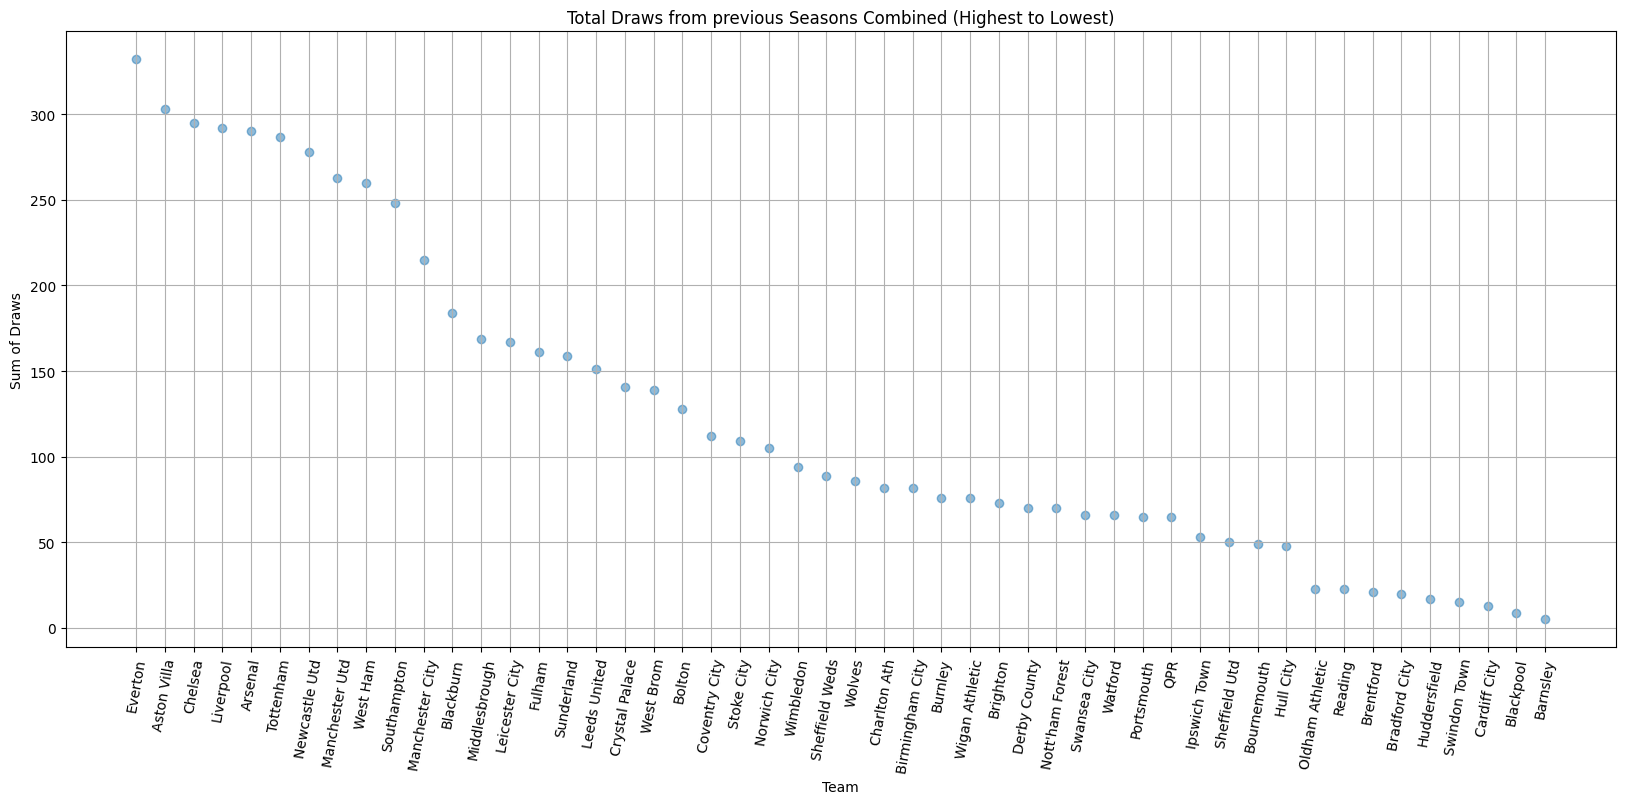

               Team    D
18          Everton  332
1       Aston Villa  303
14          Chelsea  295
25        Liverpool  292
0           Arsenal  290
43        Tottenham  287
29    Newcastle Utd  278
27   Manchester Utd  263
46         West Ham  260
38      Southampton  248
26  Manchester City  215
4         Blackburn  184
28    Middlesbrough  169
24   Leicester City  167
19           Fulham  161
40       Sunderland  159
23     Leeds United  151
16   Crystal Palace  141
45        West Brom  139
6            Bolton  128
15    Coventry City  112
39       Stoke City  109
30     Norwich City  105
48        Wimbledon   94
37   Sheffield Weds   89
49           Wolves   86
13     Charlton Ath   82
3   Birmingham City   82
11          Burnley   76
47   Wigan Athletic   76
10         Brighton   73
17     Derby County   70
31  Nott'ham Forest   70
41     Swansea City   66
44          Watford   66
33       Portsmouth   65
34              QPR   65
22     Ipswich Town   53
36    Sheffield Utd   50


In [ ]:
# Which team has the most draws from 1993 - 2023?

# Calculate the sum of draws for each team
team_draw = EPL_Data.groupby('Team')['D'].sum().reset_index()

# Sort the DataFrame by 'D' column in descending order
team_draw_sorted = team_draw.sort_values(by='D', ascending=False)

# Plot the scatterplot
plt.figure(figsize=(20, 8))
plt.xticks(rotation=80)
plt.scatter(team_draw_sorted['Team'], team_draw_sorted['D'], alpha=0.5)
plt.xlabel('Team')
plt.ylabel('Sum of Draws')
plt.title('Total Draws from previous Seasons Combined (Highest to Lowest)')
plt.grid(True)
plt.show()

# Print the sorted DataFrame
print(team_draw_sorted)

Here we can see that Arsenal has one of the highest number of combined draws from the previous seasons and they are also at the top of this years league in ranking as of right now (feb 18th, 2024).

A draw is important in Football as one point is always better than no points (from a loss).

Side Note - Some of the teams have been relegated to lower divisions since 1993 and are no longer a part of the English premier League.

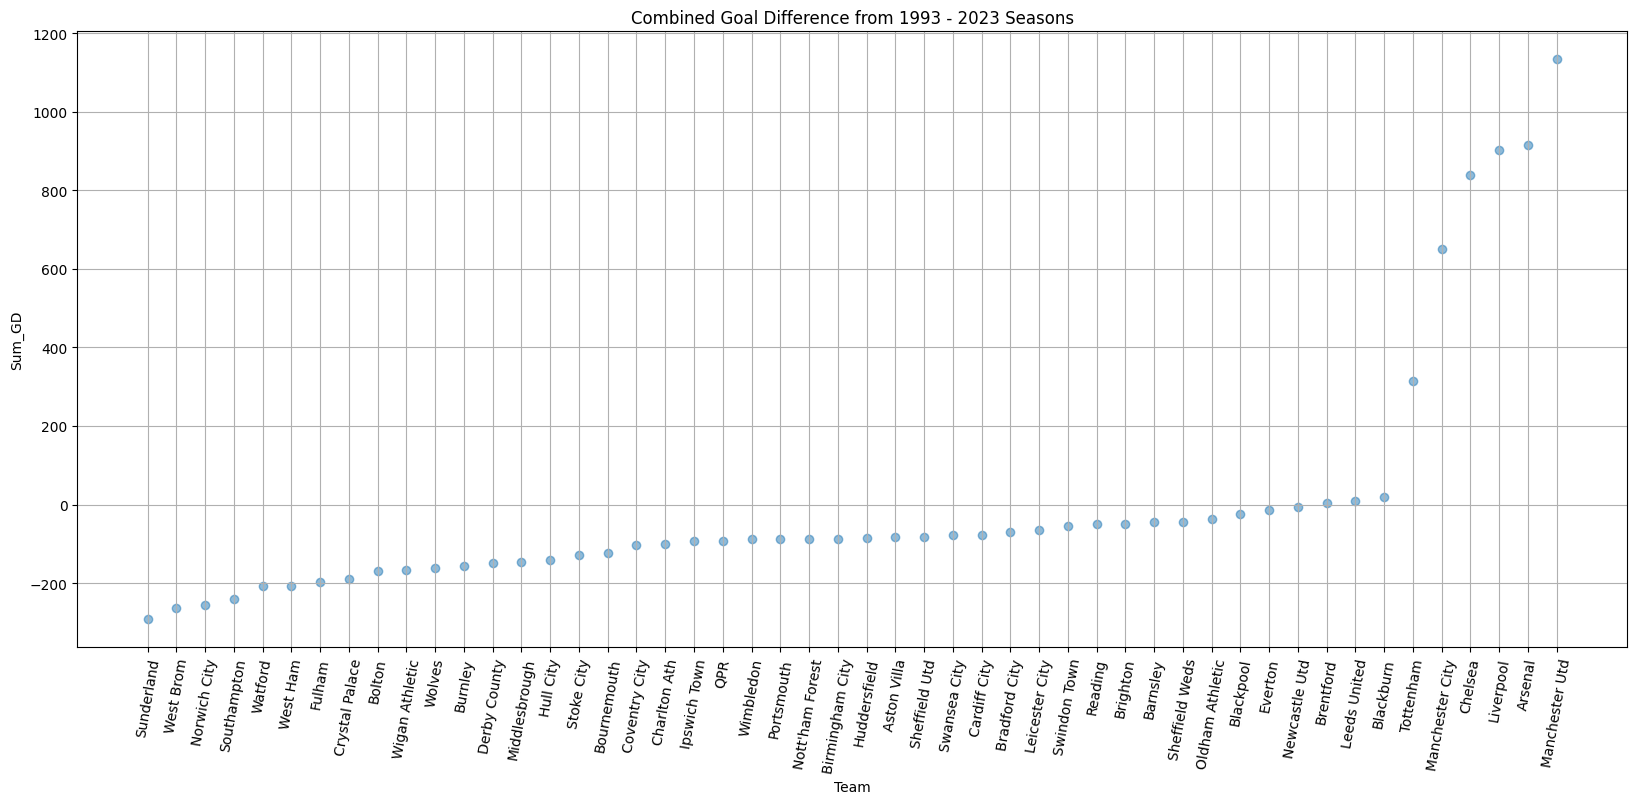

               Team    GD
40       Sunderland  -292
45        West Brom  -262
30     Norwich City  -255
38      Southampton  -241
44          Watford  -208
46         West Ham  -207
19           Fulham  -198
16   Crystal Palace  -188
6            Bolton  -170
47   Wigan Athletic  -166
49           Wolves  -161
11          Burnley  -155
17     Derby County  -149
28    Middlesbrough  -146
21        Hull City  -142
39       Stoke City  -127
7       Bournemouth  -123
15    Coventry City  -103
13     Charlton Ath  -100
22     Ipswich Town   -93
34              QPR   -92
48        Wimbledon   -88
33       Portsmouth   -88
31  Nott'ham Forest   -88
3   Birmingham City   -87
20     Huddersfield   -84
1       Aston Villa   -83
36    Sheffield Utd   -83
41     Swansea City   -77
12     Cardiff City   -77
8     Bradford City   -70
24   Leicester City   -65
42     Swindon Town   -53
35          Reading   -50
10         Brighton   -49
2          Barnsley   -45
37   Sheffield Weds   -44
32  Oldham A

In [ ]:
# Visualise the Goal Difference for each team based on previous seasons from 1993 - 2023

import matplotlib.pyplot as plt

# Calculate the sum of GD for each team
team_GD = EPL_Data.groupby('Team')['GD'].sum().reset_index()

# Sort the DataFrame by GD in ascending order
team_GD_sorted = team_GD.sort_values(by='GD')

# Plot the scatterplot
plt.figure(figsize=(20, 8))
plt.xticks(rotation=80)
plt.scatter(team_GD_sorted['Team'], team_GD_sorted['GD'], alpha=0.5)
plt.xlabel('Team')
plt.ylabel('Sum_GD')
plt.title('Combined Goal Difference from 1993 - 2023 Seasons')
plt.grid(True)
plt.show()

# Print the sorted DataFrame
print(team_GD_sorted)

The Goal Difference shows the number of goals scored versus the number of goals let into the teams goal during a match. So if the home team scores 5 and the opposing team scores 2, the GD for that match was 3 for the home team.

66% of the teams with a positive Goal Difference over the previous seasons are currently still dominating teams within the current Premier League and in world football. These teams are known across the globe in football and an interesting data point here is Leicester City who won the Premier League in 2015 are surrounded by Teams yet to achieve this prestigious achievment in recent years.

Side Note - to make this data project more realistic, a code would need to be used to take into account recent years rather than the 1900's for more accurate predicitive analysis. Alternatively, the last 3 seasons could be more accurate in this case even though there is less data because teams with different managers or players had different results.

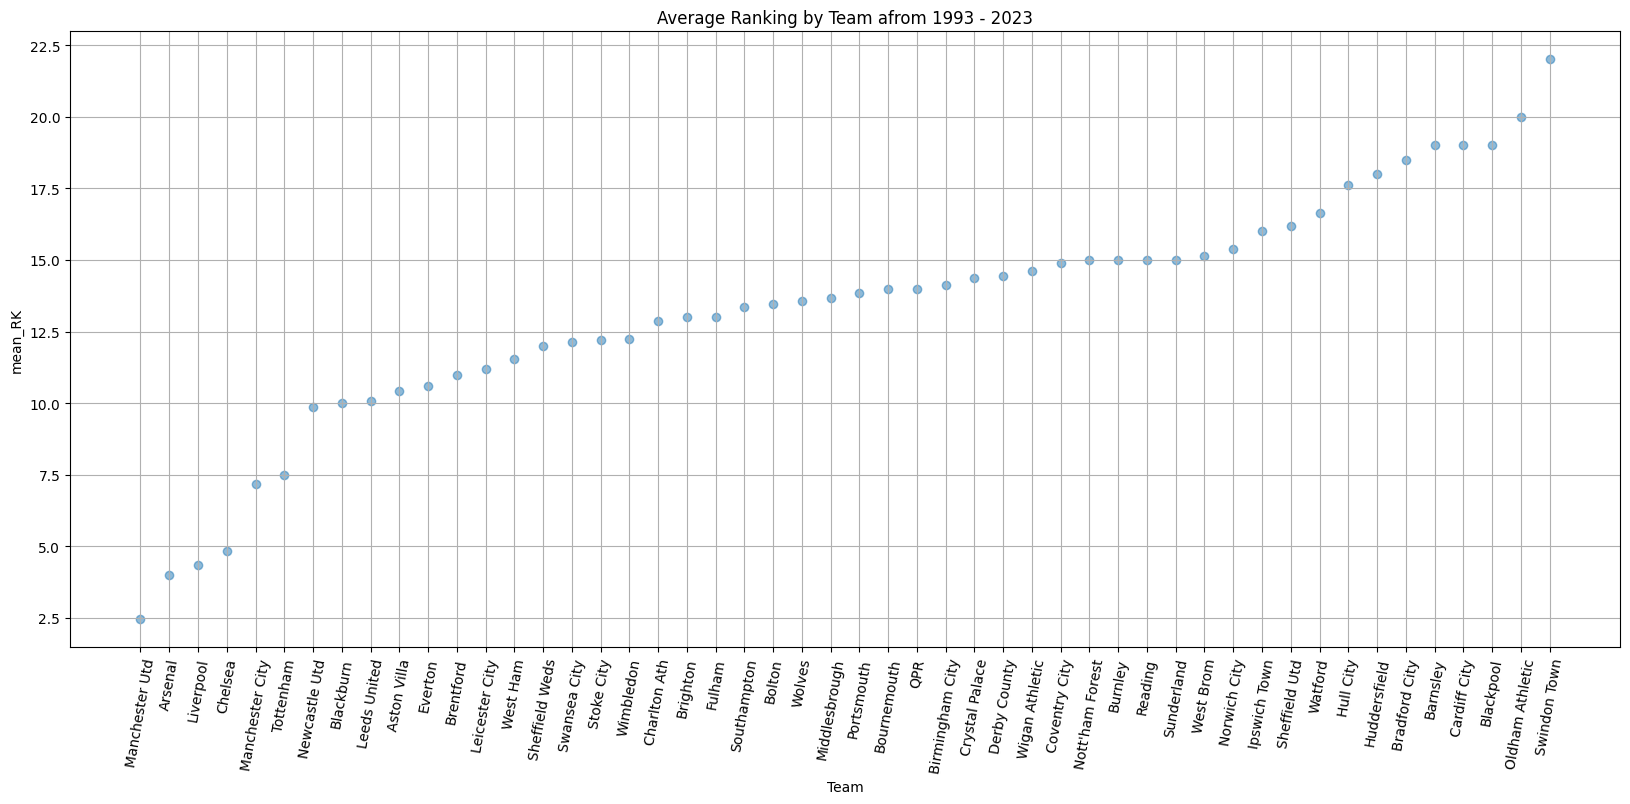

               Team         Rk
27   Manchester Utd   2.451613
0           Arsenal   4.000000
25        Liverpool   4.354839
14          Chelsea   4.838710
26  Manchester City   7.192308
43        Tottenham   7.483871
29    Newcastle Utd   9.857143
4         Blackburn  10.000000
23     Leeds United  10.066667
1       Aston Villa  10.428571
18          Everton  10.612903
9         Brentford  11.000000
24   Leicester City  11.176471
46         West Ham  11.555556
37   Sheffield Weds  12.000000
41     Swansea City  12.142857
39       Stoke City  12.200000
48        Wimbledon  12.250000
13     Charlton Ath  12.875000
10         Brighton  13.000000
19           Fulham  13.000000
38      Southampton  13.375000
6            Bolton  13.461538
49           Wolves  13.555556
28    Middlesbrough  13.666667
33       Portsmouth  13.857143
7       Bournemouth  14.000000
34              QPR  14.000000
3   Birmingham City  14.142857
16   Crystal Palace  14.357143
17     Derby County  14.428571
47   Wig

In [ ]:
#Calculate the mean ranking (Rk) for each team from 1993 - 2023
team_RK = EPL_Data.groupby('Team')['Rk'].mean().reset_index()

# Sort the DataFrame by Rk in ascending order
team_RK_sorted = team_RK.sort_values(by='Rk', ascending=True)

# Plot the scatterplot
plt.figure(figsize=(20, 8))
plt.xticks(rotation=80)
plt.scatter(team_RK_sorted['Team'], team_RK_sorted['Rk'], alpha=0.5)
plt.xlabel('Team')
plt.ylabel('mean_RK')
plt.title('Average Ranking by Team afrom 1993 - 2023')
plt.grid(True)
plt.show()

# Print the sorted DataFrame
print(team_RK_sorted)

This can also be viewed as a bar chart

<ipython-input-9-6ce4a859a812>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Team", y="Rk", data=average_rank_sorted, palette='mako')


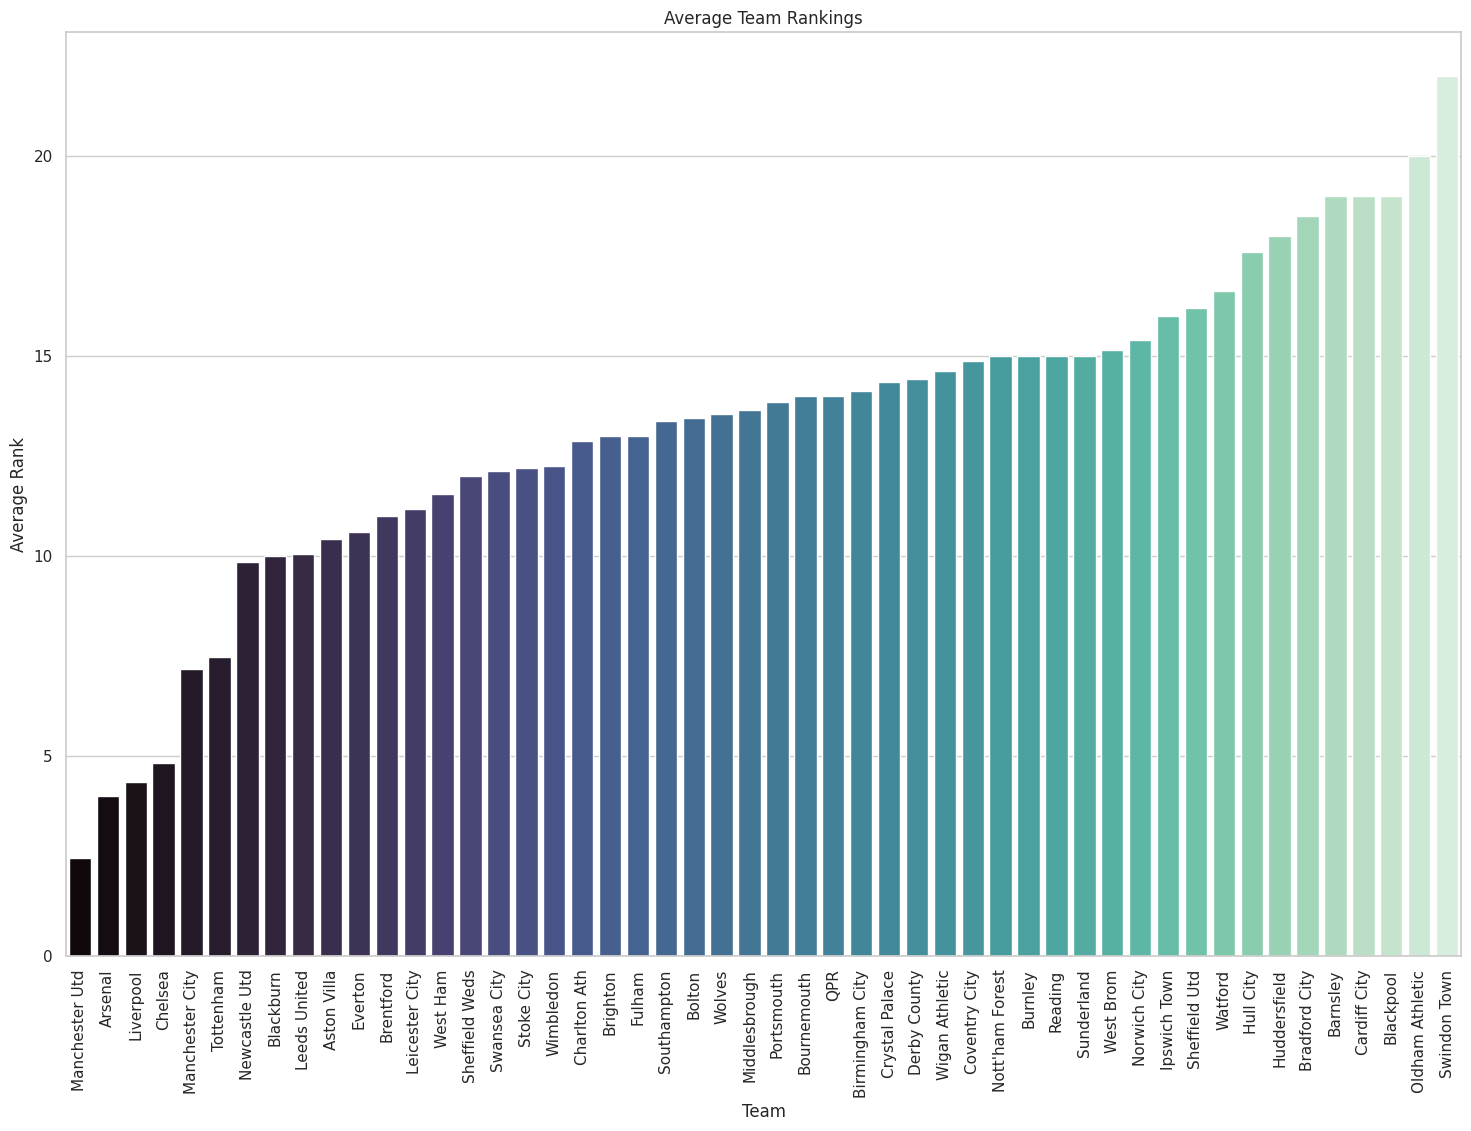

In [ ]:
# Create a Bar Chart to display the new variable from best to worst

# Calculate the average ranking for each team
average_rank = EPL_Data.groupby('Team')['Rk'].mean().reset_index()

# Sort the DataFrame by 'Rk' column in ascending order of average ranking
average_rank_sorted = average_rank.sort_values(by='Rk', ascending=True)

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Create barplot
sns.barplot(x="Team", y="Rk", data=average_rank_sorted, palette='mako')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set title and axis labels
plt.title("Average Team Rankings")
plt.xlabel("Team")
plt.ylabel("Average Rank")

# Show plot
plt.show()

The top 7 teams from the past 30 years are all world renowned and have therefore sustained their success over a long period of time in the English Premier League and in world football throughout other tournaments. We can verify this using the notes section of the data set where these teams contain achievments which others don't across the EPL and World Football.

In [ ]:
# Creating a varibale with all Premier League Winners + the number of times they won the title
winners = (EPL_Data[EPL_Data.Rk == 1])

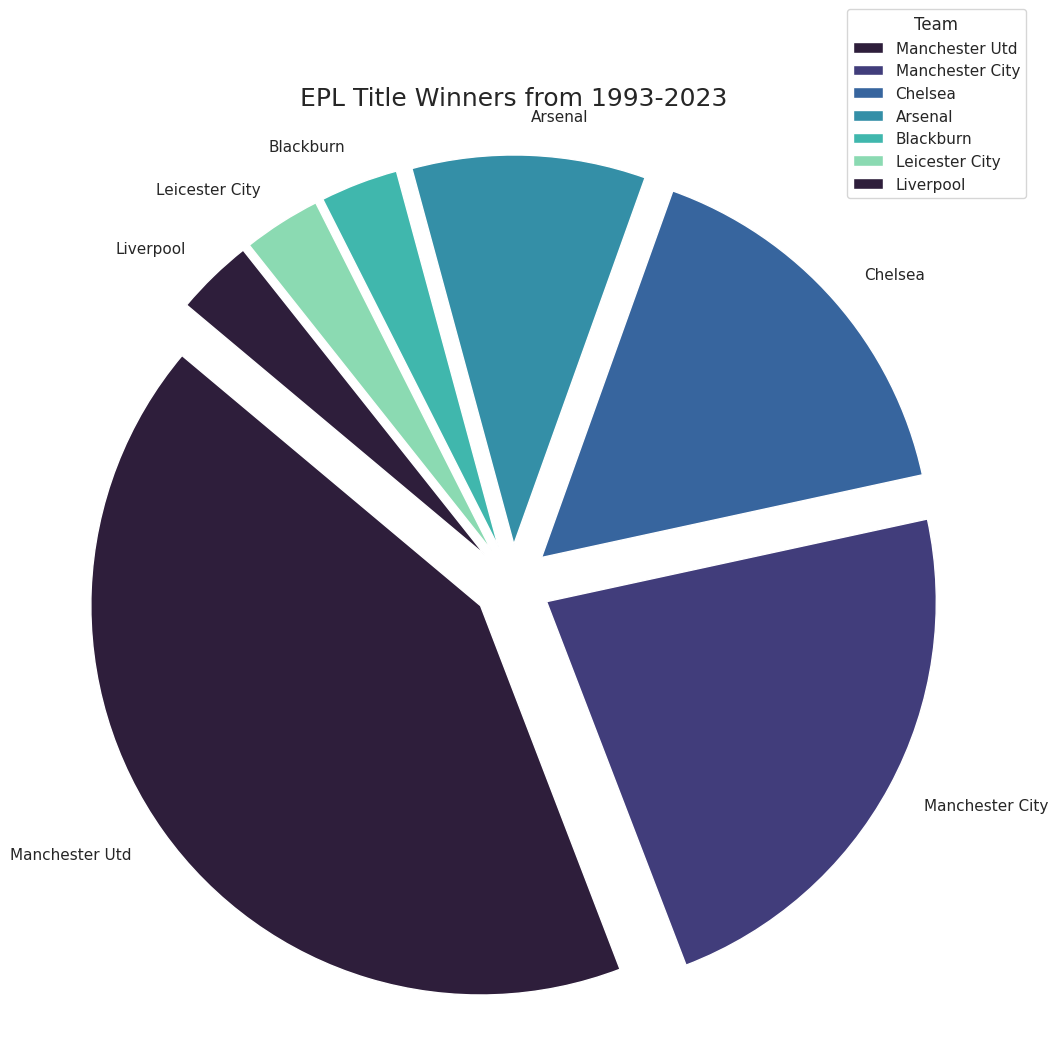

In [ ]:
# Creating a Pie Chart to visualise the winner for the last 30 years

# Count the number of titles won by each team
season = winners['Team'].value_counts()

# Set the figure size
plt.figure(figsize=(12, 12))

# Define explode values to space out slices
explode = [0.1] * len(season)  # Adjust the value to control the spacing

# Plot the pie chart
plt.pie(season.values, labels=season.index, startangle=140, colors=sns.color_palette('mako'), explode=explode)

# Set title and legend
plt.title('EPL Title Winners from 1993-2023', fontsize=18)
plt.legend(season.index, title='Team', loc='best', bbox_to_anchor=(0.85, 0.9))

# Set aspect ratio to be equal
plt.axis('equal')

# Show the plot
plt.show()

There is a strong correlation with the top average rankers each season having also won the premier league title in previous years, so it would be a safe bet to create a hyopthesis stating that if a team has won the EPL in the last 30 years, they are still in the premier league and will rank in the top 10 at the end of the 2024 season.

The English Premier League is said to be the highest quality in the world and it has been dominated by 6 teams over the last 30 years. Black Burn Rovers makes up the 7th team however they are the only anomoly in the dominating part. On 7 May 2012, Blackburn were relegated to the Championship after being defeated at home by Wigan Athletic in the penultimate game of the season, ending eleven years in the Premier League.

# Regression Analysis


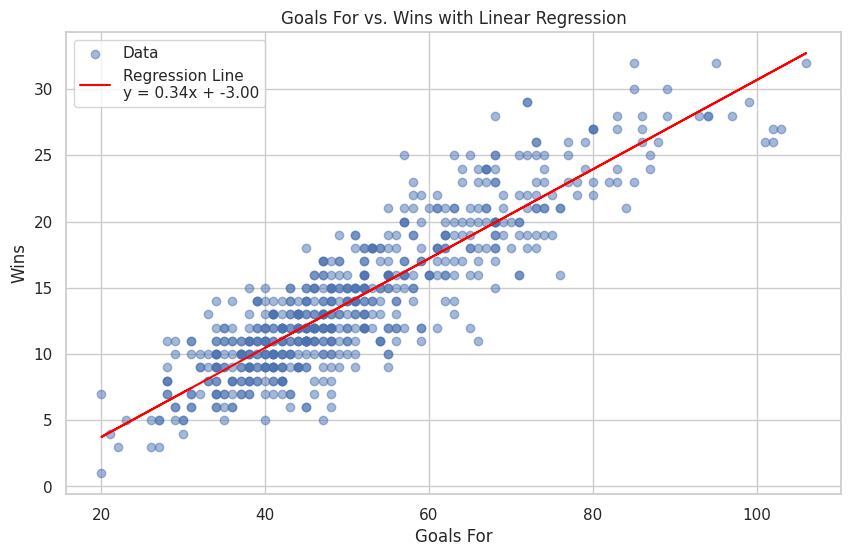

In [ ]:
# Goals for in relation to Wins

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Extract variables from EPL_Data
goals_for = EPL_Data['GF']
wins = EPL_Data['W']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(goals_for, wins)

# Calculate the line of best fit
line_of_best_fit = slope * goals_for + intercept

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(goals_for, wins, alpha=0.5, label='Data')
plt.plot(goals_for, line_of_best_fit, color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.xlabel('Goals For')
plt.ylabel('Wins')
plt.title('Goals For vs. Wins with Linear Regression')
plt.grid(True)
plt.legend()
plt.show()

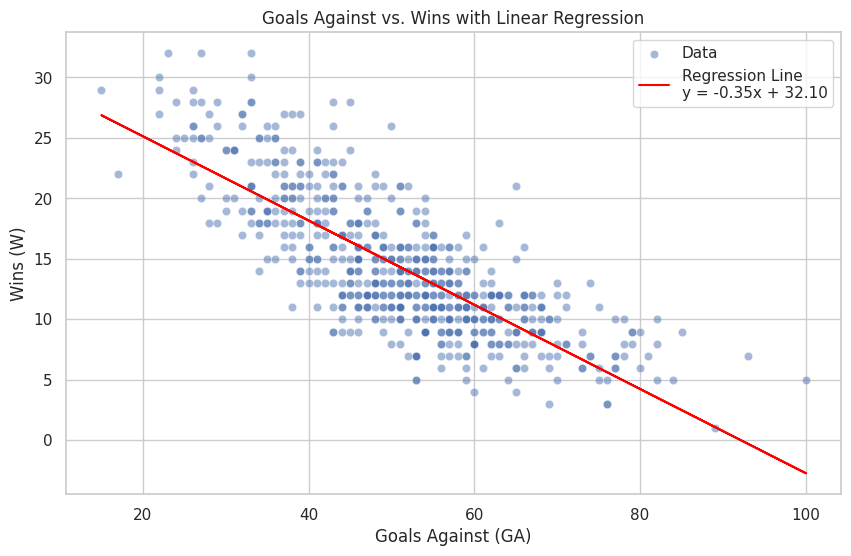

In [ ]:
# Goals Against in relation to Wins

# Extract variables from EPL_Data
goals_against = EPL_Data['GA']
wins = EPL_Data['W']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(goals_against, wins)

# Calculate the line of best fit
line_of_best_fit = slope * goals_against + intercept

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=goals_against, y=wins, alpha=0.5, label='Data')
plt.plot(goals_against, line_of_best_fit, color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}')

# Add labels and title
plt.xlabel('Goals Against (GA)')
plt.ylabel('Wins (W)')
plt.title('Goals Against vs. Wins with Linear Regression')
plt.grid(True)
plt.legend()
plt.show()


As we could foresee, the number of goals scored correlates possitively with the number of wins and the higher number of goals against a team correlates negatively to the number of wins.

# USING H2O TO PREDICT THE 2024 RANKINGS

In [ ]:
# Import the h2o library
!apt-get install default-jre
!java -version
import os
!pip install h2o
import h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
import pandas as pd
import h2o

# Initialize the h2o cluster
h2o.init()

# Convert the Pandas DataFrame to a h2o Frame
h2o_data = h2o.H2OFrame(EPL_Data)

# Define your features used as the x variable (all columns except the target variable 'Pts')
features = [col for col in EPL_Data.columns if col != 'Pts']

# Train the h2o model
model = h2o.estimators.H2ORandomForestEstimator(ntrees=100)
model.train(x=features, y='Pts', training_frame=h2o_data)

# Predict the target variable for the next 22 rows
predictions = model.predict(h2o_data.tail(22))

# Convert predictions to a list
predictions_list = predictions.as_data_frame()['predict'].tolist()

# Create a DataFrame for the new 22 rows with dummy data
new_rows = pd.DataFrame(columns=EPL_Data.columns)
for _ in range(22):
    new_rows = new_rows.append(pd.Series(), ignore_index=True)

# Insert predictions into the last column of the new rows DataFrame
new_rows['Pts'] = predictions_list

# Concatenate the original DataFrame and the new rows DataFrame
EPL_Data = pd.concat([EPL_Data, new_rows], ignore_index=True)

# Print the updated DataFrame with predictions
print(EPL_Data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvvm6jzk1
  JVM stdout: /tmp/tmpvvm6jzk1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvvm6jzk1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_4ps45x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


<ipython-input-15-fcb73ba88f05>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_rows = new_rows.append(pd.Series(), ignore_index=True)
<ipython-input-15-fcb73ba88f05>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(pd.Series(), ignore_index=True)
<ipython-input-15-fcb73ba88f05>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_rows = new_rows.append(pd.Series(), ignore_index=True)
<ipython-input-15-fcb73ba88f05>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(pd.Series(), ignore_index=True)
<ipython-input-15-fcb73b

    Season_End_Year           Team   Rk   MP    W    D    L   GF   GA   GD  \
0              1993        Arsenal   10   42   15   11   16   40   38    2   
1              1993    Aston Villa    2   42   21   11   10   57   40   17   
2              1993      Blackburn    4   42   20   11   11   68   46   22   
3              1993        Chelsea   11   42   14   14   14   51   54   -3   
4              1993  Coventry City   15   42   13   13   16   52   57   -5   
..              ...            ...  ...  ...  ...  ...  ...  ...  ...  ...   
643             NaN            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
644             NaN            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
645             NaN            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
646             NaN            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
647             NaN            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       Pts                                      Notes  
0    56

The ntrees parameter specifies the number of trees to grow in the forest. In this case, it's set to 100. To improve the H2O predictions further, it's essential to find a balance between model complexity and generalization performance. This balance can often be achieved through hyperparameter tuning, where the number of trees is one of the hyperparameters optimized to maximize model performance on a validation dataset. Cross-validation techniques can also be used to assess how changes in the number of trees affect the model's performance on unseen data.

# CLEAN UP THE DATA FRAME

In [ ]:
# Define the row indices and column name where you want to insert the value
row_indices = range(626, 648)  # Use range() to define a range of row indices
column_name = 'Season_End_Year'  # Replace 'Column_Name' with the name of the column

# Define the 2024 season
value_to_insert = '2024'

# Insert the value into the specified locations
EPL_Data.loc[row_indices, column_name] = value_to_insert

# Print the updated DataFrame
print(EPL_Data)

    Season_End_Year           Team   Rk   MP    W    D    L   GF   GA   GD  \
0              1993        Arsenal   10   42   15   11   16   40   38    2   
1              1993    Aston Villa    2   42   21   11   10   57   40   17   
2              1993      Blackburn    4   42   20   11   11   68   46   22   
3              1993        Chelsea   11   42   14   14   14   51   54   -3   
4              1993  Coventry City   15   42   13   13   16   52   57   -5   
..              ...            ...  ...  ...  ...  ...  ...  ...  ...  ...   
643            2024            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
644            2024            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
645            2024            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
646            2024            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
647            2024            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       Pts                                      Notes  
0    56

In [ ]:
# copy the teams from the 2023 season into the new rows for the 2024 season

# Select data from specific rows and columns
selected_data = EPL_Data.loc[606:625, 'Team']  # Selecting rows 0 to 21 in the 'Team' column

# Paste the selected data to other rows in the same column
EPL_Data.loc[626:645, 'Team'] = selected_data.values  # Copying to rows 626 to 648 in the 'Team' column

# Print the updated DataFrame
print(EPL_Data)

    Season_End_Year           Team   Rk   MP    W    D    L   GF   GA   GD  \
0              1993        Arsenal   10   42   15   11   16   40   38    2   
1              1993    Aston Villa    2   42   21   11   10   57   40   17   
2              1993      Blackburn    4   42   20   11   11   68   46   22   
3              1993        Chelsea   11   42   14   14   14   51   54   -3   
4              1993  Coventry City   15   42   13   13   16   52   57   -5   
..              ...            ...  ...  ...  ...  ...  ...  ...  ...  ...   
643            2024      Tottenham  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
644            2024       West Ham  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
645            2024         Wolves  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
646            2024            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
647            2024            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       Pts                                      Notes  
0    56

In [ ]:
EPL_Data

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56.00,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74.00,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71.00,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56.00,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
643,2024,Tottenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.68,NaN
644,2024,West Ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.96,NaN
645,2024,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.89,NaN
646,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.19,NaN


The teams that were relegated from the 2023 season (Leicester City, Southampton, Leeds united) can be disregarded from the 2024 rankings.

We now have the predicted points and need to order them so we can see the predicted rankings for the 2024 season based on the previous 30 years.

# PREDICTED 2024 EPL RANKINGS - based on the previous 30 years

In [ ]:
# prompt: Print the last 22 rows from EPL_Data and order them by the Pts column

EPL_Data.tail(22).sort_values(by=['Pts'], ascending=False)

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
640,2024,Newcastle Utd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.750,NaN
628,2024,Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.970,NaN
641,2024,Nott'ham Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.380,NaN
642,2024,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.240,NaN
639,2024,Manchester Utd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.790,NaN
632,2024,Crystal Palace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.970,NaN
629,2024,Brentford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.130,NaN
645,2024,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.890,NaN
631,2024,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.185,NaN
626,2024,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.740,NaN


Based on all previous Seasons, we can see that New castle United are predicted to win the 2024 English Premier League. More insights can be made by comparing the 2023 rankings with the predicted rankings.

If we wanted to predict more accurately for the 2024 Rankings rather than using 30 years worth of data, we could use the previous 3 seasons rather than the last 30 since players and managers come and go every season and this would give us more up to date data to work with when predicting.